# Football Data Analysis Toolkit - Examples

In [1]:
%matplotlib inline
import footballdata as foo
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# plt.rcParams['figure.figsize'] = (16.0, 12.0)
# plt.style.use('ggplot')

## FiveThirtyEight

In [2]:
five38 = foo.FiveThirtyEight()

In [3]:
print(five38.__doc__)

Provides pandas.DataFrames from 
    the fivethirtyeight.com project "2016-17 Club Soccer Predictions"

    Data will be downloaded as necessary and cached locally in ./data


    More info:
    https://projects.fivethirtyeight.com/soccer-predictions/
    https://fivethirtyeight.com/features/how-our-club-soccer-projections-work/

    Source JSON:
    https://projects.fivethirtyeight.com/soccer-predictions/data.json

    Parameters
    ----------
    league_ids : string or iterable of league-ids to include, None for all
    


### Leagues

In [4]:
five38.league_ids

['bundesliga',
 'champions-league',
 'la-liga',
 'liga-mx',
 'ligue-1',
 'mls',
 'nwsl',
 'premier-league',
 'serie-a']

In [5]:
leagues = five38.leagues()
leagues

,champions,league_id,longName,relegated,teams
league,,,,,
bundesliga,4,1845,Bundesliga,2,18
champions-league,0,1818,Champions League,0,32
la-liga,4,1869,La Liga,3,20
liga-mx,4,1975,Liga MX,1,18
ligue-1,3,1843,Ligue 1,2,20
mls,3,1951,MLS,0,22
nwsl,0,4582,NWSL,0,10
premier-league,4,2411,Premier League,3,20
serie-a,3,1854,Serie A,3,20


In [6]:
five38.league_ids = ['la-liga', 'premier-league']
df_leagues = five38.leagues()
df_leagues

,champions,league_id,longName,relegated,teams
league,,,,,
la-liga,4,1869,La Liga,3,20
premier-league,4,2411,Premier League,3,20


### Game predictions and results

In [7]:
games = five38.games()
games.head()

adj_score1  adj_score2  \
league  datetime            id                                  
la-liga 2016-08-19 18:45:00 400894015       1.050        1.05   
        2016-08-19 20:00:00 400894018       2.100        1.05   
        2016-08-20 16:15:00 400894012       6.008        2.10   
        2016-08-20 18:15:00 400893989       1.050        1.05   
        2016-08-20 20:15:00 400894017       6.214        4.20   

                                      aggregate_winner  chances1  chances2  \
league  datetime            id                                               
la-liga 2016-08-19 18:45:00 400894015             None     0.917     0.811   
        2016-08-19 20:00:00 400894018             None     1.704     0.328   
        2016-08-20 16:15:00 400894012             None     3.859     0.262   
        2016-08-20 18:15:00 400893989             None     0.810     1.791   
        2016-08-20 20:15:00 400894017             None     2.518     1.783   

                                        leg  moves1  moves2   prob1   prob2  \
league  datetime            id                                                
la-liga 2016-08-19 18:45:00 400894015  None   1.398   0.690  0.5475  0.1897   
        2016-08-19 20:00:00 400894018  None   0.478   0.809  0.5003  0.2260   
        2016-08-20 16:15:00 400894012  None   5.294   0.337  0.9591  0.0071   
        2016-08-20 18:15:00 400893989  None   0.822   1.032  0.3194  0.3917   
        2016-08-20 20:15:00 400894017  None   2.326   0.750  0.5952  0.1760   

                                           ...       shootout_winner status  \
league  datetime            id             ...                                
la-liga 2016-08-19 18:45:00 400894015      ...                  None   post   
        2016-08-19 20:00:00 400894018      ...                  None   post   
        2016-08-20 16:15:00 400894012      ...                  None   post   
        2016-08-20 18:15:00 400893989      ...                  None   post   
        2016-08-20 20:15:00 400894017      ...                  None   post   

                                                     team1  team1_code  \
league  datetime            id                                           
la-liga 2016-08-19 18:45:00 400894015               Málaga         MGA   
        2016-08-19 20:00:00 400894018  Deportivo La Coruña         DEP   
        2016-08-20 16:15:00 400894012            Barcelona         BAR   
        2016-08-20 18:15:00 400893989              Granada         GRN   
        2016-08-20 20:15:00 400894017           Sevilla FC         SEV   

                                      team1_id team1_sdr_id       team2  \
league  datetime            id                                            
la-liga 2016-08-19 18:45:00 400894015       99        74004     Osasuna   
        2016-08-19 20:00:00 400894018       90        74022       Eibar   
        2016-08-20 16:15:00 400894012       83        74014  Real Betis   
        2016-08-20 18:15:00 400893989     3747        74005  Villarreal   
        2016-08-20 20:15:00 400894017      243        93401    Espanyol   

                                      team2_code  team2_id  team2_sdr_id  
league  datetime            id                                            
la-liga 2016-08-19 18:45:00 400894015        OSA        97         74015  
        2016-08-19 20:00:00 400894018        EIB      3752         73965  
        2016-08-20 16:15:00 400894012        BET       244         74025  
        2016-08-20 18:15:00 400893989        VLR       102         74019  
        2016-08-20 20:15:00 400894017        ESP        88         74018  

[5 rows x 24 columns]

### League position forecasts by team, including history

In [8]:
forecasts = five38.forecasts()
forecasts.head()

code  current_losses  \
league  last_updated        name                                   
la-liga 2016-08-18 14:00:00 Alavés           ALA               0   
                            Athletic Bilbao  BIL               0   
                            Atletico Madrid  ATL               0   
                            Barcelona        BAR               0   
                            Celta Vigo       VIG               0   

                                             current_ties  current_wins  \
league  last_updated        name                                          
la-liga 2016-08-18 14:00:00 Alavés                      0             0   
                            Athletic Bilbao             0             0   
                            Atletico Madrid             0             0   
                            Barcelona                   0             0   
                            Celta Vigo                  0             0   

                                             d_rating  goal_diff  \
league  last_updated        name                                   
la-liga 2016-08-18 14:00:00 Alavés            1.29658   -20.5007   
                            Athletic Bilbao   0.98432    -0.9131   
                            Atletico Madrid   0.61564    31.3052   
                            Barcelona         0.65523    75.8026   
                            Celta Vigo        1.12691    -7.6691   

                                             goals_against  goals_scored  \
league  last_updated        name                                           
la-liga 2016-08-18 14:00:00 Alavés                 58.0649       37.5642   
                            Athletic Bilbao        47.7403       46.8272   
                            Atletico Madrid        29.1405       60.4457   
                            Barcelona              26.7882      102.5908   
                            Celta Vigo             52.8428       45.1737   

                                            group    id   ...     position_5  \
league  last_updated        name                          ...                  
la-liga 2016-08-18 14:00:00 Alavés           None    96   ...         0.0206   
                            Athletic Bilbao  None    93   ...         0.0810   
                            Atletico Madrid  None  1068   ...         0.1016   
                            Barcelona        None    83   ...         0.0057   
                            Celta Vigo       None    85   ...         0.0532   

                                             position_6  position_7  \
league  last_updated        name                                      
la-liga 2016-08-18 14:00:00 Alavés               0.0268      0.0309   
                            Athletic Bilbao      0.0780      0.0767   
                            Atletico Madrid      0.0627      0.0444   
                            Barcelona            0.0031      0.0011   
                            Celta Vigo           0.0620      0.0659   

                                             position_8  position_9  \
league  last_updated        name                                      
la-liga 2016-08-18 14:00:00 Alavés               0.0385      0.0434   
                            Athletic Bilbao      0.0718      0.0675   
                            Atletico Madrid      0.0329      0.0216   
                            Barcelona            0.0008      0.0005   
                            Celta Vigo           0.0633      0.0669   

                                             relegated  sdr_id    ties  \
league  last_updated        name                                         
la-liga 2016-08-18 14:00:00 Alavés              0.3021   74003  9.5713   
                            Athletic Bilbao     0.0888   74011  9.7752   
                            Atletico Madrid     0.0027   74010  9.2438   
                            Barcelona           0.0000   74014  5.2603   
                            Ce

In [9]:
forecasts.shape

(1440, 41)

In [10]:
forecasts.reset_index().dtypes

league                    object
last_updated      datetime64[ns]
name                      object
code                      object
current_losses             int64
current_ties               int64
current_wins               int64
d_rating                 float64
goal_diff                float64
goals_against            float64
goals_scored             float64
group                     object
id                         int64
losses                   float64
make_champs              float64
make_europa              float64
o_rating                 float64
position_1               float64
position_10              float64
position_11              float64
position_12              float64
position_13              float64
position_14              float64
position_15              float64
position_16              float64
position_17              float64
position_18              float64
position_19              float64
position_2               float64
position_20              float64
position_2

#### The most unbalanced league

In [11]:
la_liga = (forecasts
     .reset_index()
     .set_index(['name'])
     .loc[['Barcelona', 'Real Madrid', 'Atletico Madrid'], ['last_updated', 'win_league']]
     .reset_index()
     .pivot(index='last_updated', columns='name', values='win_league')
     .sort_index()
           
    )
la_liga.head()

name,Atletico Madrid,Barcelona,Real Madrid
last_updated,,,
2016-08-18 14:00:00,0.0577,0.5979,0.3166
2016-08-25 14:00:00,0.0428,0.5535,0.3804
2016-09-01 14:00:00,0.0291,0.6110,0.3445
2016-09-15 14:00:00,0.0619,0.5259,0.3904
2016-09-22 14:00:00,0.0823,0.5376,0.3625


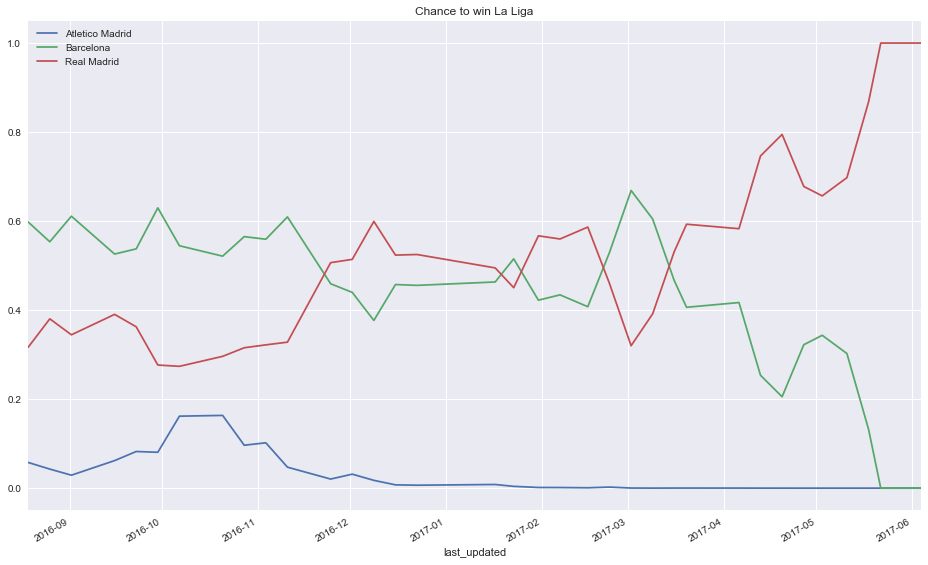

In [12]:
fig = la_liga.plot(figsize=(16,10))
fig.set_title('Chance to win La Liga')
fig.legend();

In [13]:
likely_winners = (forecasts.loc[['la-liga']]
                  .reset_index()
                  .groupby(['name'])
                  .agg({'win_league': 'mean'})
                  .sort_values(by='win_league', ascending=False)
                 )
likely_winners.head()

,win_league
name,
Real Madrid,0.521518
Barcelona,0.438208
Atletico Madrid,0.029355
Sevilla FC,0.007362
Villarreal,0.001506


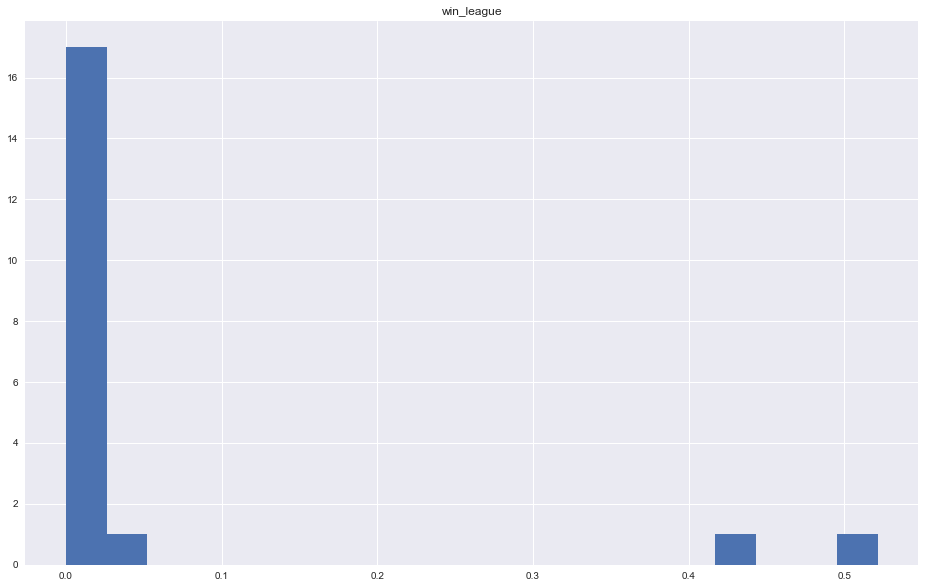

In [14]:
likely_winners.hist(bins=20, figsize=(16, 10));

In [15]:
likely_winners = (forecasts.loc[['premier-league']]
                  .reset_index()
                  .groupby(['name'])
                  .agg({'win_league': 'mean'})
                  .sort_values(by='win_league', ascending=False)
                 )
likely_winners.head()

,win_league
name,
Chelsea,0.552630
Manchester City,0.213437
Arsenal,0.084139
Liverpool,0.079138
Tottenham Hotspur,0.038306


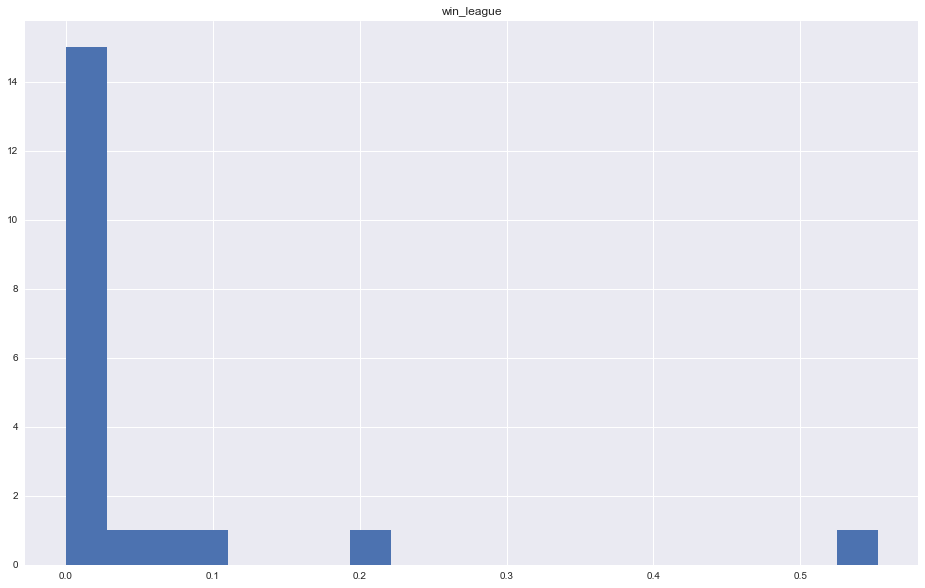

In [16]:
likely_winners.hist(bins=20, figsize=(16, 10));

### Clinches

In [17]:
clinches = five38.clinches()
clinches.head()

league_id  team_id               typ
league  date                                            
la-liga 2017-02-26       1869       97   win_league_elim
        2017-03-01       1869       97  make_champs_elim
        2017-03-01       1869     3788   win_league_elim
        2017-03-04       1869       83    relegated_elim
        2017-03-04       1869     3747   win_league_elim